In [1]:
%matplotlib inline
import pydataset
import matplotlib.pyplot as plt
import seaborn
from sklearn import tree, preprocessing, model_selection
import pandas as pd

In [2]:
pydataset.data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [15]:
titanic = pydataset.data('titanic')

,class,age,sex,survived
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1


In [17]:
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [4]:
titanic.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


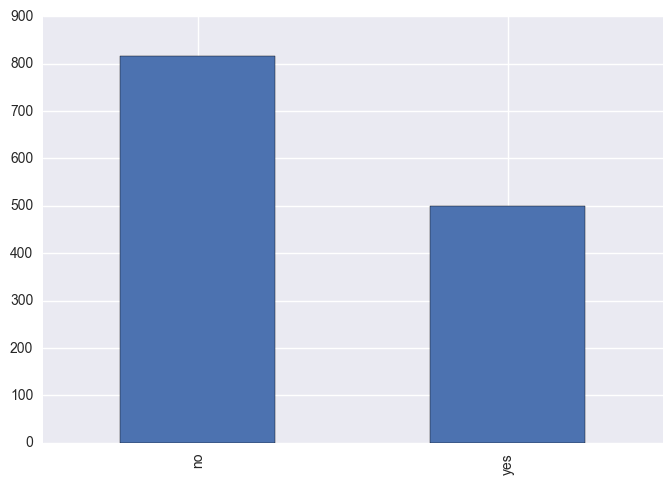

In [5]:
titanic['survived'].value_counts().plot(kind='bar')

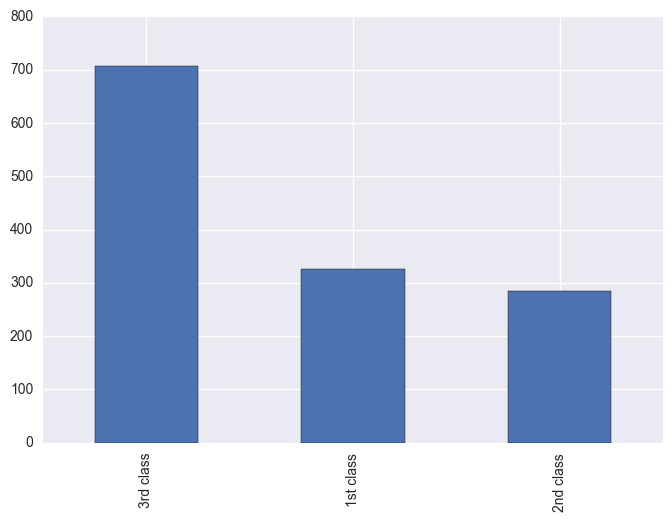

In [6]:
titanic['class'].value_counts().plot(kind='bar')

In [7]:
titanic.groupby('class')['survived'].value_counts().sort_index()

class      survived
1st class  no          122
           yes         203
2nd class  no          167
           yes         118
3rd class  no          528
           yes         178
Name: survived, dtype: int64

In [8]:
titanic.groupby('survived')['age'].value_counts()

survived  age   
no        adults    765
          child      52
yes       adults    442
          child      57
Name: age, dtype: int64

In [9]:
le = preprocessing.LabelEncoder()
titanic['survived'] = le.fit_transform(titanic['survived'])
titanic['class'] = le.fit_transform(titanic['class'])
titanic['age'] = le.fit_transform(titanic['age'])
titanic['sex'] = le.fit_transform(titanic['sex'])

In [10]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    titanic[['class', 'age', 'sex']], titanic['survived'], test_size=0.33
)

In [11]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit(X_train, Y_train)
clf_dt.score(X_test, Y_test)

0.81149425287356325

In [12]:
to_predict = pd.DataFrame(
    [['3rd class', 'child', 'man'], ['1st class', 'adults', 'man'], ['2nd class', 'adults', 'woman']],
    columns=['class', 'age', 'sex']
)
to_predict['class'] = le.fit_transform(to_predict['class'])
to_predict['age'] = le.fit_transform(to_predict['age'])
to_predict['sex'] = le.fit_transform(to_predict['sex'])
clf_dt.predict(to_predict)

array([0, 0, 1])

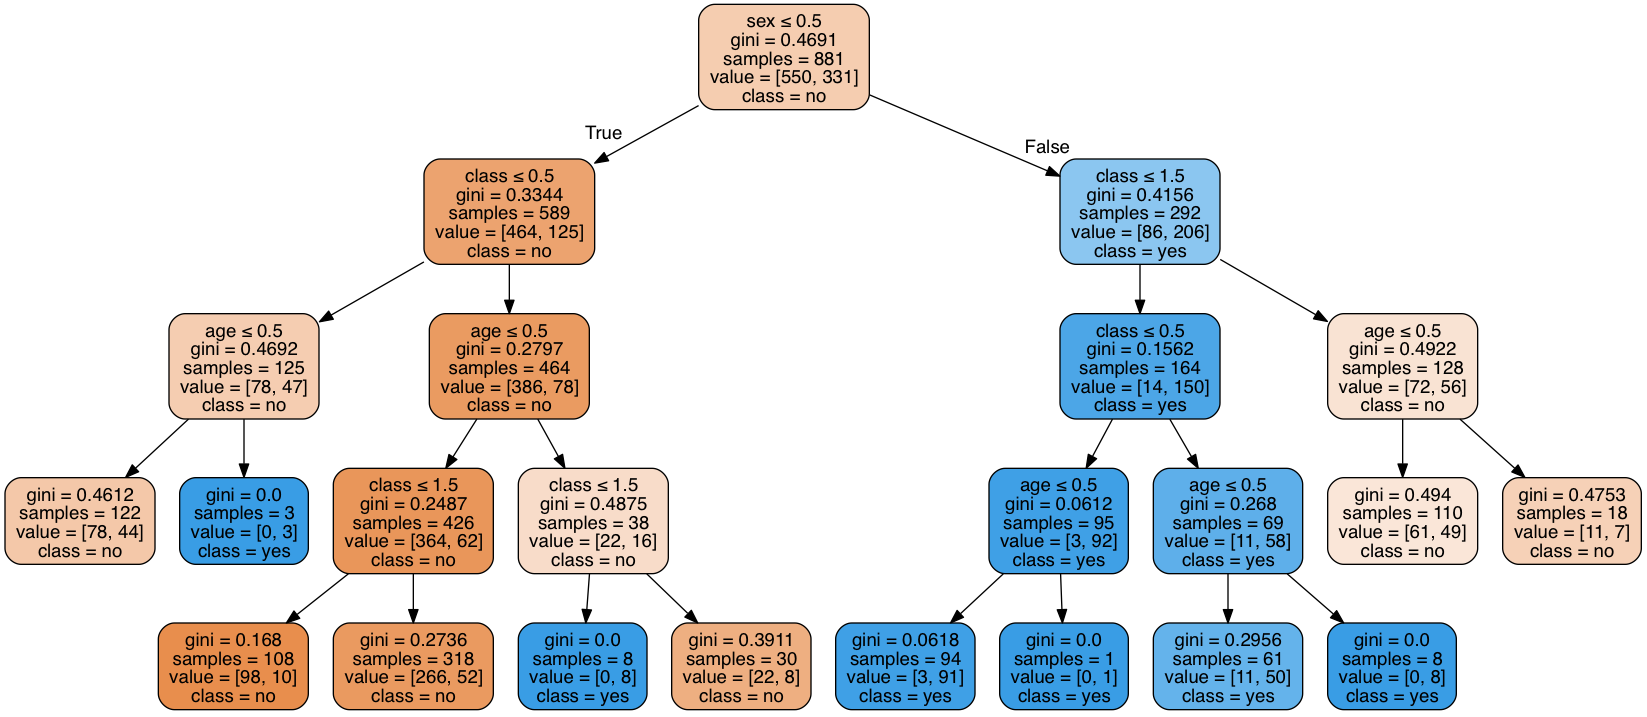

In [14]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(
    clf_dt, out_file=None, feature_names=list(titanic.columns.values),
    class_names=['no', 'yes'], filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  